In [1]:
suppressPackageStartupMessages({library(Seurat)
library(ggpubr)
library(dplyr)
library(dittoSeq)
library(tidyseurat)
library(tictoc)
})
o<-function(w,h)options(repr.plot.width=w, repr.plot.height=h)
library(SuperCell)

In [2]:
seu.all.healthy = readRDS('/oak/stanford/groups/xiaojie/chensj16/data/engreitz-lab/all_healthy.RDS')

# update source names

In [3]:
seu.all.healthy@meta.data$source.old <-  seu.all.healthy@meta.data$source

new.source <-  seu.all.healthy@meta.data$source
new.source[new.source=='FT033_FT047_a']        ='FT033'
new.source[new.source=='FT033_FT047_b']        ='FT047'
new.source[new.source=='FT051_FT056_FT066_a']  ='FT051'
new.source[new.source=='FT051_FT056_FT066_b']  ='FT056'
new.source[new.source=='FT051_FT056_FT066_c']  ='FT066'
new.source[new.source=='FT055_FT069_FT035_a']  ='FT055'
new.source[new.source=='FT055_FT069_FT035_b']  ='FT069'
new.source[new.source=='FT057_FT064_a']        ='FT057'
new.source[new.source=='FT057_FT064_b']        ='FT064'
new.source[new.source=='FT060_FT067_a']        ='FT060'
new.source[new.source=='FT060_FT067_b']        ='FT067'

new.source ->  seu.all.healthy@meta.data$source

In [5]:
seu.all.healthy

# A Seurat-tibble abstraction: 750,611 × 25
# Features=31019 | Cells=750611 | Active assay=RNA | Assays=RNA
   .cell      orig.ident nCount_RNA nFeature_RNA  nUMI nGene ratio.mt ratio.ribo
   <chr>      <chr>           <dbl>        <int> <dbl> <int>    <dbl>      <dbl>
 1 FT014020_… FT014020_1       2874         1677  2882  1685 0.00243     0.0104 
 2 FT014020_… FT014020_1       3087         1624  3091  1628 0.169       0.0333 
 3 FT014020_… FT014020_1       4088         2310  4092  2314 0.0413      0.0227 
 4 FT014020_… FT014020_1       3178         1900  3181  1903 0.000943    0.00534
 5 FT014020_… FT014020_1       3346         1560  3348  1562 0.00209     0.00299
 6 FT014020_… FT014020_1       5831         2863  5838  2870 0.0195      0.0123 
 7 FT014020_… FT014020_1       1172          863  1173   864 0.00853     0.0111 
 8 FT014020_… FT014020_1       3289         1571  3293  1575 0.192       0.0115 
 9 FT014020_… FT014020_1       4963         2451  4984  2469 0.0108      0.0118 
1

# exclude cell types

In [6]:
# Exclude these cell types
seu.all.healthy <- seu.all.healthy %>% filter(
    !(celltype %in% c('SchwannCells_precursors', 'SchwannCells_premyelinating_1', 'SchwannCells_premyelinating_2', 'SchwannCells_premyelinating_3', 
                      'CNC_PAA','Endothelial_LiverSinusoidalEC',  'Endothelial_VeinEC_pulmonary', 'SAN_tail','Epicardial_2')
     )
)

# merge cell types

In [7]:
new.celltype <- data.frame(
    celltype=seu.all.healthy$celltype
) %>% mutate(
    celltype_new=case_when(
        celltype %in% 
        c("VCM_transition_1",
          "VCM_transition_2",
          "VCM_transition_3") ~ "VCM_transition",
        celltype %in% 
        c("AV_Tz_1",
          "AV_Tz_2",
          "AV_Tz_3",
          "AV_Tz_4") ~ "AV_Tz", 
        .default=celltype)
) 

new.celltype

,celltype,celltype_new
,<chr>,<chr>
FT014020_1_AGAACCGCACTTACAG,Endothelial_CapEC_endo,Endothelial_CapEC_endo
FT014020_1_AGTGCGGAGCGAGGTG,Endocardial_VentricularEC_3,Endocardial_VentricularEC_3
FT014020_1_AGTCGCATCAAGTGAG,Endocardial_VentricularEC_3,Endocardial_VentricularEC_3
FT014020_1_CTATGGCCATAATTGC,ACM_right_compact_2,ACM_right_compact_2
FT014020_1_GGGAATATCCTCGATC,VCM_left_compact_2,VCM_left_compact_2
FT014020_1_TACATCAAGTCATTTC,Endocardial_cellcycle,Endocardial_cellcycle
FT014020_1_TCGCGAGGTGTTGCTT,CFB_mature,CFB_mature
FT014020_1_CGCCACACAGGACCAA,VCM_left_trabecular_3,VCM_left_trabecular_3
FT014020_1_CAAACATGTTACATCC,Immune_B_cell,Immune_B_cell


In [8]:
seu.all.healthy@meta.data$celltype  <-  new.celltype$celltype_new 

# heart sample completeness

In [9]:
sel = seu.all.healthy@meta.data$source %in% c('FT055','FT069','FT051','FT056','FT057','FT064',
                                              'FT066','FT025','FT026','FT015','FT033','FT047',
                                              'FT060','FT065','FT067','FT071','FT018','FT061')
seu.all.healthy@meta.data[sel, 'completeness'] <- 'ALL'

sel = seu.all.healthy@meta.data$source %in% c("FT035","FT040","FT062","FT034","FT044","FT072",
                                              "FT038","FT058","FT070","FT029","FT041","FT043",
                                              "FT052","FT039","FT074","FT017","FT005","FT016",
                                              "FT053","FT020","FT054","FT030","FT027")
seu.all.healthy@meta.data[sel, 'completeness'] <- 'HALF'

# update metadata

In [10]:
rownames(seu.all.healthy@meta.data) -> seu.all.healthy@meta.data$bc

In [43]:
newmeta <- read.csv('./Items2Include - CelltypeList.v09162024.csv') %>% head(-1) 

newmeta <- merge(x = seu.all.healthy@meta.data, 
      y=newmeta[,c('Celltype','New_Name','NMF_label','Plot_label')], 
      by.x = 'celltype', by.y='Celltype', sort=F, all.x=T)

rownames(newmeta) <- newmeta$bc

newmeta <- newmeta[rownames(seu.all.healthy@meta.data), ]
seu.all.healthy@meta.data <- newmeta

In [44]:
seu.all.healthy@meta.data

,celltype,orig.ident,nCount_RNA,nFeature_RNA,nUMI,nGene,ratio.mt,ratio.ribo,cells,nUMI_non_MT,⋯,celltype_label,Rounded.PCW,Sex,coarse_celltype,source.old,completeness,bc,New_Name,NMF_label,Plot_label
,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
FT014020_1_AGAACCGCACTTACAG,Endothelial_CapEC_endo,FT014020_1,2874,1677,2882,1685,0.0024288688,0.010409438,AGAACCGCACTTACAG,2875,⋯,Endothelial,18,Male,Endothelial,FT020,HALF,FT014020_1_AGAACCGCACTTACAG,Capillary_endothelial_cells_2,Endocardial_endothelial,EndothelialCells
FT014020_1_AGTGCGGAGCGAGGTG,Endocardial_VentricularEC_3,FT014020_1,3087,1624,3091,1628,0.1692009059,0.033322549,AGTGCGGAGCGAGGTG,2568,⋯,Endocardial,18,Male,Endocardial,FT020,HALF,FT014020_1_AGTGCGGAGCGAGGTG,Ventricular_endocardial_cells_3,Endocardial_endothelial,EndocardialCells
FT014020_1_AGTCGCATCAAGTGAG,Endocardial_VentricularEC_3,FT014020_1,4088,2310,4092,2314,0.0413000978,0.022727273,AGTCGCATCAAGTGAG,3923,⋯,Endocardial,18,Male,Endocardial,FT020,HALF,FT014020_1_AGTCGCATCAAGTGAG,Ventricular_endocardial_cells_3,Endocardial_endothelial,EndocardialCells
FT014020_1_CTATGGCCATAATTGC,ACM_right_compact_2,FT014020_1,3178,1900,3181,1903,0.0009430997,0.005344231,CTATGGCCATAATTGC,3178,⋯,ACM,18,Male,ACM,FT020,HALF,FT014020_1_CTATGGCCATAATTGC,ACM_right_lowTNNI_2,ACM,ACM
FT014020_1_GGGAATATCCTCGATC,VCM_left_compact_2,FT014020_1,3346,1560,3348,1562,0.0020908005,0.002986858,GGGAATATCCTCGATC,3341,⋯,VCM,18,Male,VCM,FT020,HALF,FT014020_1_GGGAATATCCTCGATC,VCM_left_compact_2,VCM,VCM
FT014020_1_TACATCAAGTCATTTC,Endocardial_cellcycle,FT014020_1,5831,2863,5838,2870,0.0195272354,0.012332991,TACATCAAGTCATTTC,5724,⋯,Endocardial,18,Male,Endocardial,FT020,HALF,FT014020_1_TACATCAAGTCATTTC,Endocardial_cell_cycling,Endocardial_endothelial,EndocardialCells
FT014020_1_TCGCGAGGTGTTGCTT,CFB_mature,FT014020_1,1172,863,1173,864,0.0085251492,0.011082694,TCGCGAGGTGTTGCTT,1163,⋯,FB,18,Male,FB,FT020,HALF,FT014020_1_TCGCGAGGTGTTGCTT,Mature_fibroblasts,FB,Fibroblasts
FT014020_1_CGCCACACAGGACCAA,VCM_left_trabecular_3,FT014020_1,3289,1571,3293,1575,0.1916185849,0.011539630,CGCCACACAGGACCAA,2662,⋯,VCM,18,Male,VCM,FT020,HALF,FT014020_1_CGCCACACAGGACCAA,VCM_left_trabecular_3,VCM,VCM
FT014020_1_CAAACATGTTACATCC,Immune_B_cell,FT014020_1,4963,2451,4984,2469,0.0108346709,0.011837881,CAAACATGTTACATCC,4930,⋯,ImmuneCells,18,Male,LymphoidCells,FT020,HALF,FT014020_1_CAAACATGTTACATCC,B_cells,ImmuneCells,LymphoidCells


In [14]:
seu.all.healthy = NormalizeData(seu.all.healthy)
seu.all.healthy = FindVariableFeatures(seu.all.healthy, selection.method = 'vst', nfeatures = 2000)
seu.all.healthy = ScaleData(seu.all.healthy, features = VariableFeatures(seu.all.healthy))
seu.all.healthy = RunPCA(seu.all.healthy, npcs = 30, verbose = F)


Centering and scaling data matrix



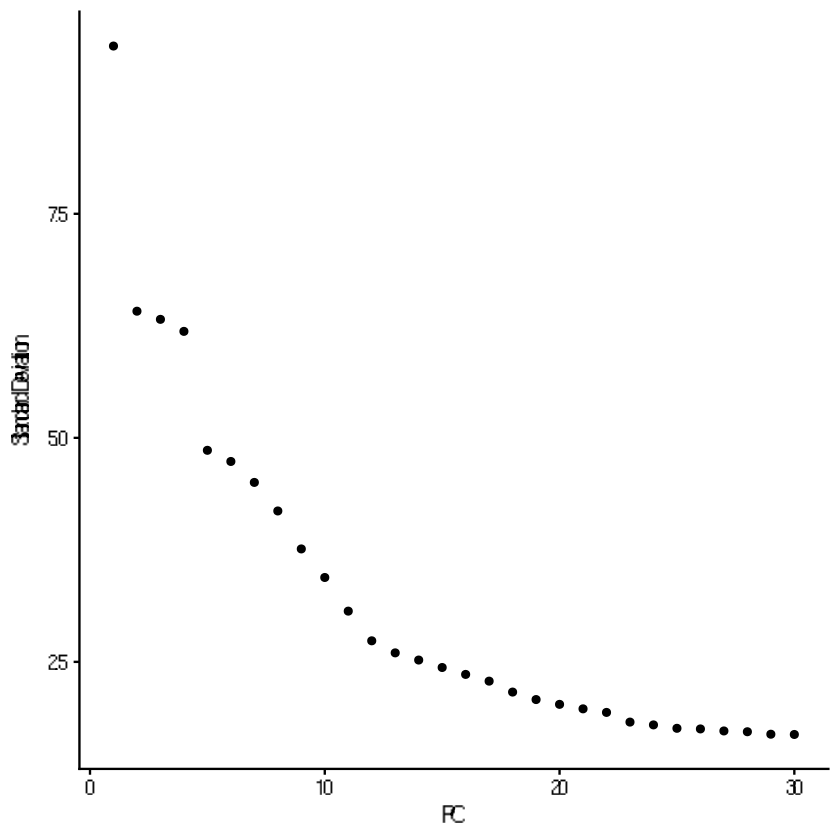

In [15]:
ElbowPlot(seu.all.healthy,ndims = 30)

In [16]:
seu.all.healthy = FindNeighbors(seu.all.healthy, reduction = "pca", dims = 1:30)
seu.all.healthy = RunUMAP(object = seu.all.healthy, dims = 1:30, verbose=F)

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [46]:
color.map <- read.csv('./Items2Include - CelltypeList.v09162024.csv') %>% head(-1) %>% select(Plot_label, HexColorCode) %>% unique %>% pull(HexColorCode)
names(color.map) <- read.csv('./Items2Include - CelltypeList.v09162024.csv') %>% head(-1) %>% select(Plot_label, HexColorCode) %>% unique %>% pull(Plot_label)
color.map

ACM                 VCM CoreConductionCells   TzConductionCells 
          "#7ec0ee"           "#F0E68C"           "#DA70D6"           "#7B68EE" 
   EndocardialCells    EndothelialCells         Fibroblasts          MuralCells 
          "#00FF00"           "#FF7F00"           "#8B8B02"           "#00CED1" 
    EpicardialCells    NeuralCrestCells    AutonomicNeurons       LymphoidCells 
          "#FFD700"           "#ff1493"           "#0000ff"           "#FB9A99" 
       MyeloidCells     NonCardiacCells 
          "#4682B4"           "#999999"

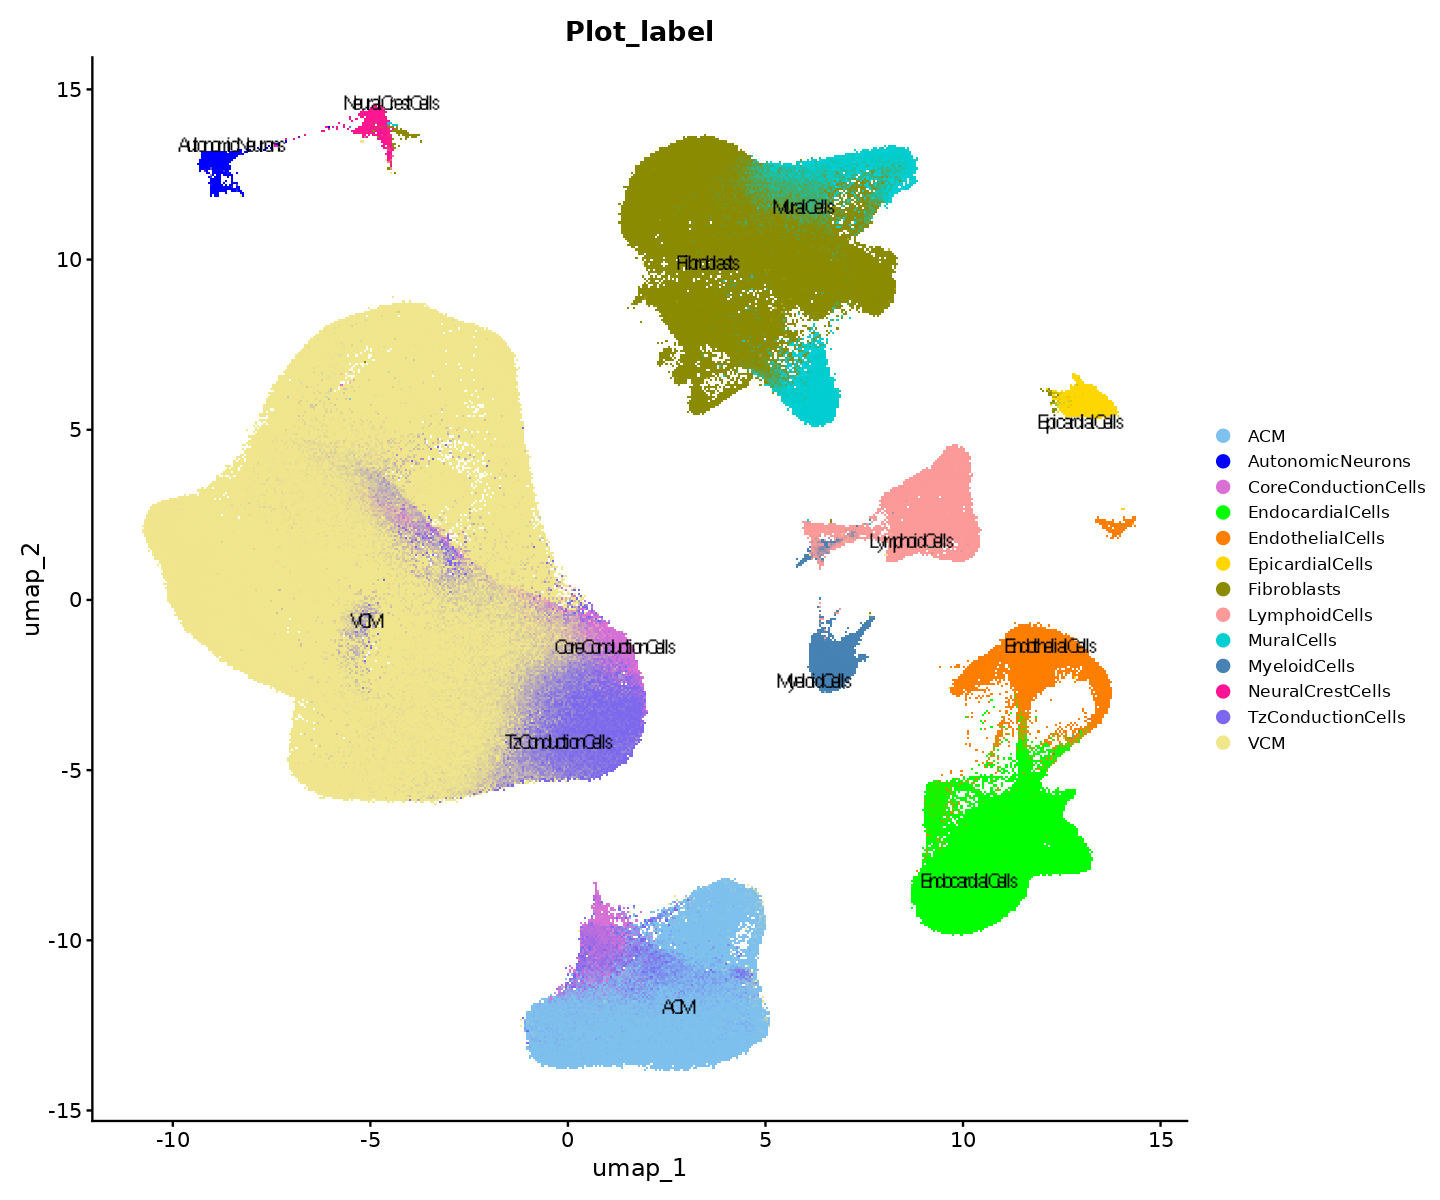

In [36]:
o(12,10)
DimPlot(seu.all.healthy, group.by='Plot_label', cols = color.map, raster=T, label=T, repel=T) & theme(
    text = element_text(family = "DejaVu Sans"),
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold", family = "DejaVu Sans"),
    axis.title.x = element_text(size = 14, family = "DejaVu Sans"),
    axis.title.y = element_text(size = 14, family = "DejaVu Sans"),
    axis.text.x = element_text(size = 12, family = "DejaVu Sans"),
    axis.text.y = element_text(size = 12, family = "DejaVu Sans"),
    legend.title = element_text(size = 12, family = "DejaVu Sans"),
    legend.text = element_text(size = 10, family = "DejaVu Sans")
)

In [49]:
color.map <- read.csv('./Items2Include - CelltypeList.v09162024.csv') %>% head(-1) %>% select(New_Name, CelltypeColor) %>% unique %>% pull(CelltypeColor)
names(color.map) <- read.csv('./Items2Include - CelltypeList.v09162024.csv') %>% head(-1) %>% select(New_Name, CelltypeColor) %>% unique %>% pull(New_Name)
color.map

ACM_left_highTNNI_1                    ACM_left_highTNNI_2 
                             "#87CEEB"                              "#000080" 
                              ACM_left                       ACM_left_lowTNNI 
                             "#4169E1"                              "#00FF00" 
                  ACM_right_highTNNI_1                   ACM_right_highTNNI_2 
                             "#228B22"                              "#96DED1" 
                   ACM_right_lowTNNI_1                    ACM_right_lowTNNI_2 
                             "#DFB9EE"                              "#CA2C92" 
                   ACM_right_lowTNNI_3                       ACM_cell_cycling 
                             "#B666D2"                              "#813695" 
                 VCM_left_trabecular_1                  VCM_left_trabecular_2 
                             "#87CEEB"                              "#000080" 
                 VCM_left_trabecular_3                        VCM_left_hybrid 
                             "#4169E1"                              "#00FF00" 
                    VCM_left_compact_1                     VCM_left_compact_2 
                             "#228B22"                              "#96DED1" 
                    VCM_left_compact_3                   VCM_right_trabecular 
                             "#DFB9EE"                              "#CA2C92" 
                     VCM_right_compact                            AV_valve_CM 
                             "#B666D2"                              "#813695" 
                      VCM_cell_cycling                        Sinoatrial_node 
                             "#5A2A65"                              "#87CEEB" 
                               AV_node                              AV_bundle 
                             "#000080"                              "#4169E1" 
                     Purkinje_fibers_1                      Purkinje_fibers_2 
                             "#00FF00"                              "#228B22" 
                     Purkinje_fibers_3            Sinoatrial_transition_cells 
                             "#96DED1"                              "#dccd10" 
            AV_node_transitional_cells           AV_bundle_transitional_cells 
                             "#FFFF00"                              "#A67202" 
  Purkinje_fibers_transitional_cells_1      VCM_conduction_transitional_cells 
                             "#DFB9EE"                              "#CA2C92" 
          Sinoatrial_node_cell_cycling           Purkinje_fibers_cell_cycling 
                             "#B666D2"                              "#813695" 
       Ventricular_endocardial_cells_1        Ventricular_endocardial_cells_2 
                             "#87CEEB"                              "#000080" 
       Ventricular_endocardial_cells_3               Atrial_endocardial_cells 
                             "#4169E1"                              "#00FF00" 
       Atrial_septum_endocardial_cells         IFT_valvular_endocardial_cells 
                             "#813695"                              "#96DED1" 
Endocardial_to_endothelial_transtition         OFT_valvular_endocardial_cells 
                             "#dccd10"                              "#FFFF00" 
            Aortic_endothelial_cells_1               Endocardial_cell_cycling 
                             "#A67202"                              "#DFB9EE" 
         Capillary_endothelial_cells_2          Capillary_endothelial_cells_1 
                             "#CA2C92"                              "#5A2A65" 
      Pre_arterial_endothelial_cells_1       Pre_arterial_endothelial_cells_2 
                             "#228B22"                              "#B666D2" 
           Mature_arterial_endothelial             Aortic_endothelial_cells_2 
                             "#FFA1D3"                              "#FF7F00" 
              Venous_endothelial_cells            Lymphatic_endotheli

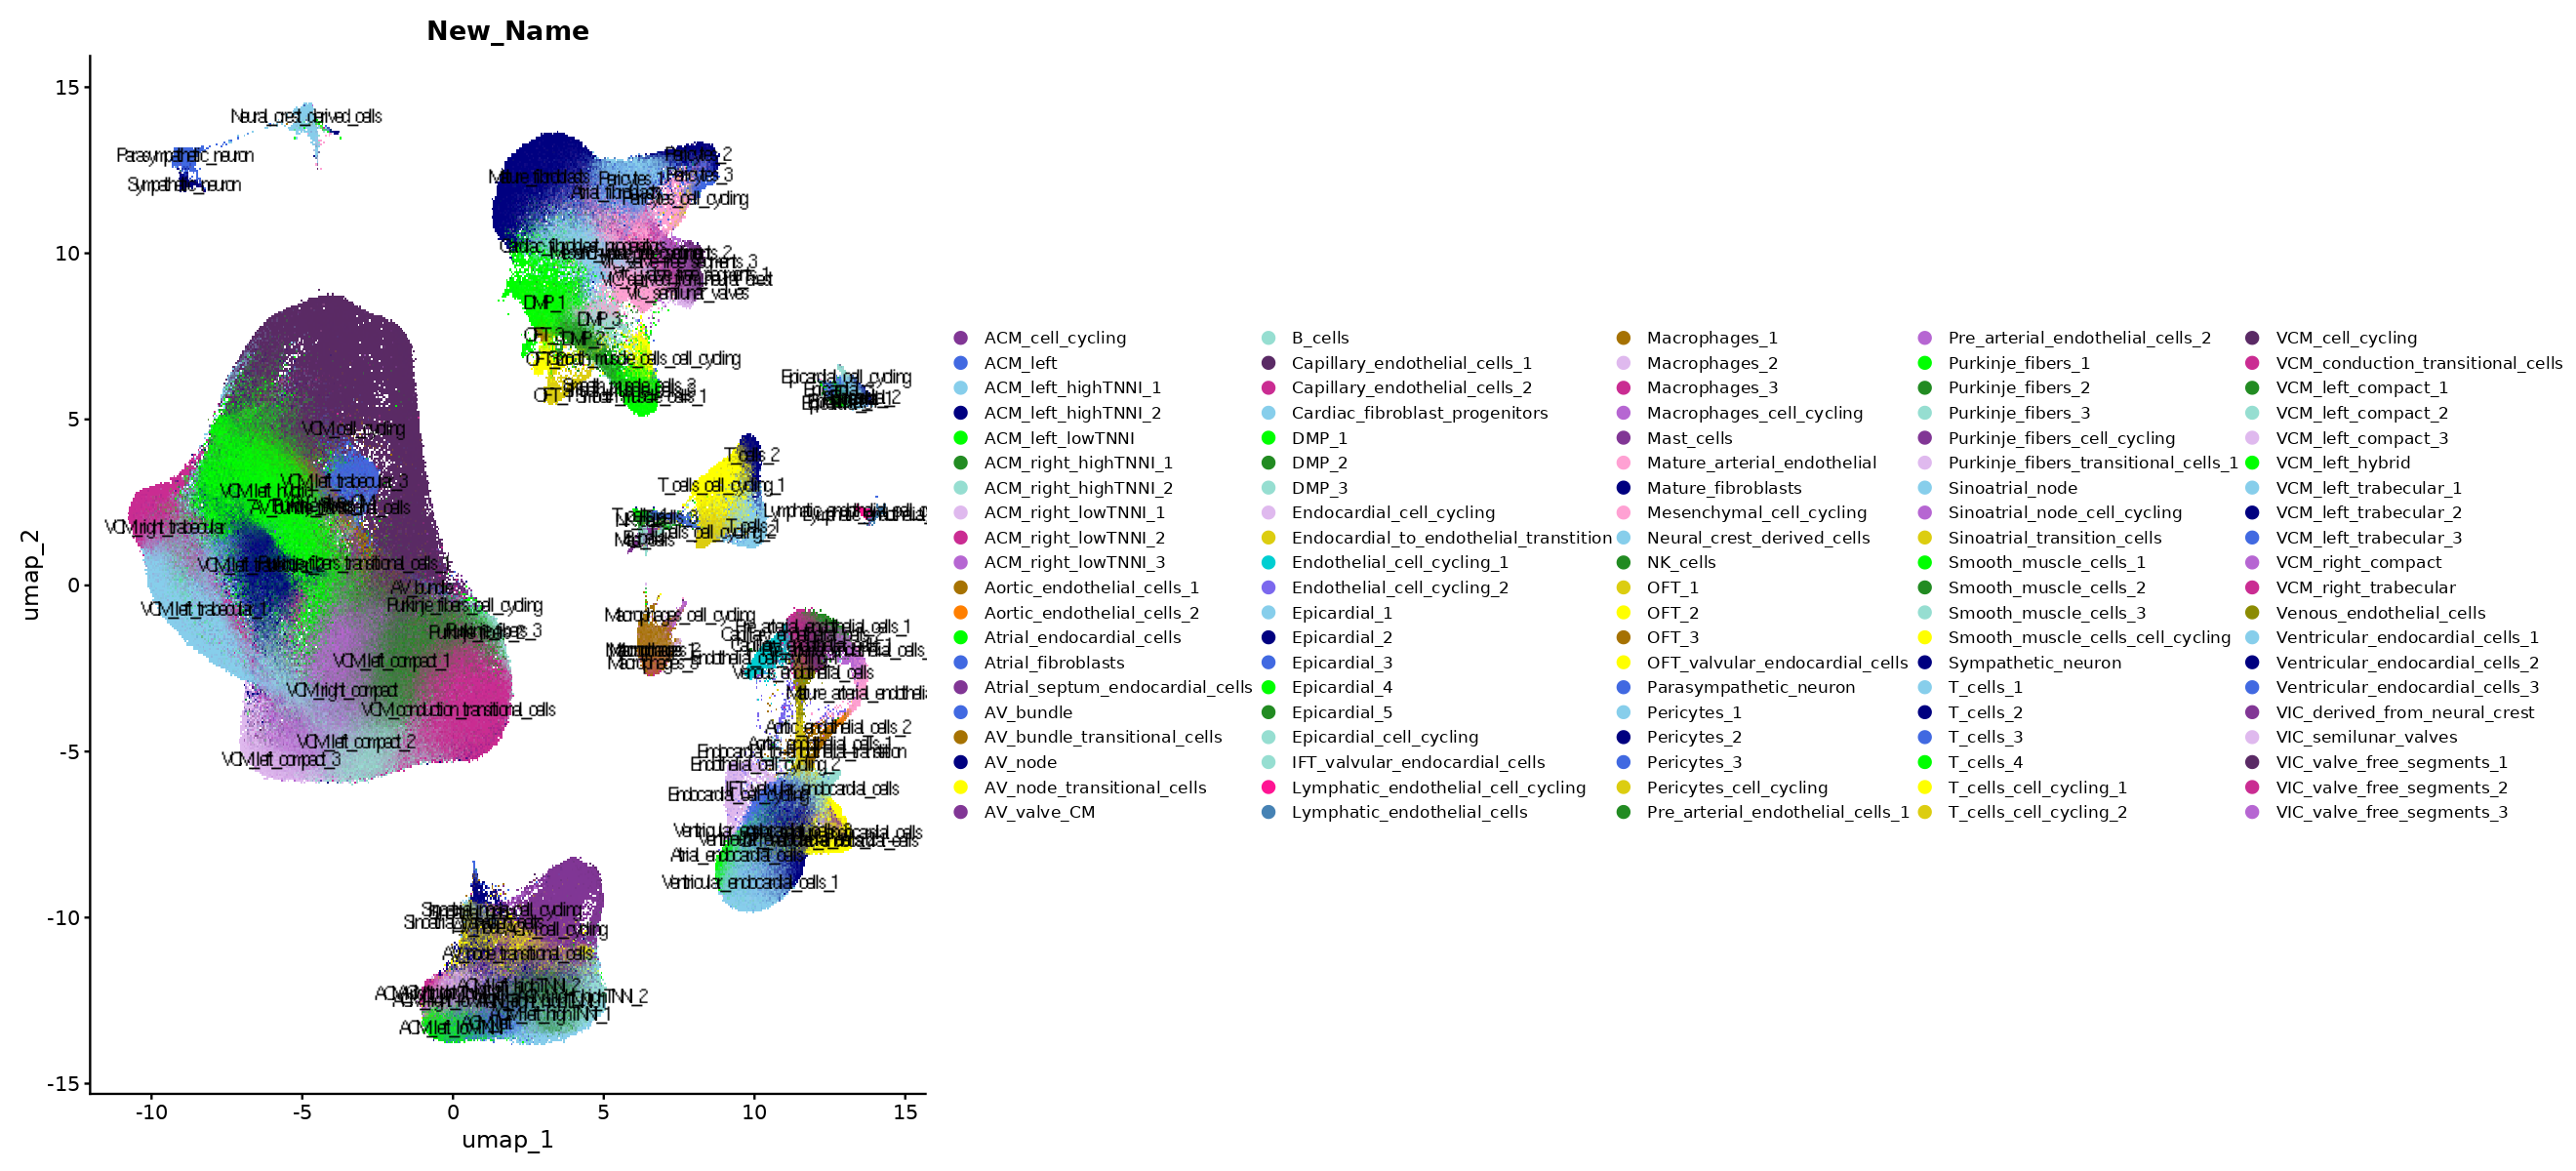

In [54]:
o(22,10)
DimPlot(seu.all.healthy, group.by='New_Name', cols = color.map, raster=T, label=T, repel=F) & theme(
    text = element_text(family = "DejaVu Sans"),
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold", family = "DejaVu Sans"),
    axis.title.x = element_text(size = 14, family = "DejaVu Sans"),
    axis.title.y = element_text(size = 14, family = "DejaVu Sans"),
    axis.text.x = element_text(size = 12, family = "DejaVu Sans"),
    axis.text.y = element_text(size = 12, family = "DejaVu Sans"),
    legend.title = element_text(size = 12, family = "DejaVu Sans"),
    legend.text = element_text(size = 10, family = "DejaVu Sans")
)

In [57]:
seu.all.early <- seu.all.healthy %>% filter(completeness =='ALL')

In [58]:
seu.all.early

# A Seurat-tibble abstraction: 271,471 × 37
# Features=31019 | Cells=271471 | Active assay=RNA | Assays=RNA
   .cell        celltype orig.ident nCount_RNA nFeature_RNA  nUMI nGene ratio.mt
   <chr>        <chr>    <chr>           <dbl>        <int> <dbl> <int>    <dbl>
 1 FT015016017… VCM_cel… FT0150160…      19350         5315 19355  5320 0.0703  
 2 FT015016017… VCM_rig… FT0150160…       8179         2940  8189  2950 0.000855
 3 FT015016017… VCM_lef… FT0150160…       5492         2572  5498  2578 0.0218  
 4 FT015016017… VCM_cel… FT0150160…      11520         3761 11525  3766 0.000694
 5 FT015016017… SMC_cel… FT0150160…       6574         3015  6577  3018 0.00715 
 6 FT015016017… CFB_DMP… FT0150160…       9018         3454  9029  3464 0.00111 
 7 FT015016017… Sympath… FT0150160…       4834         2238  4847  2250 0.00103 
 8 FT015016017… ACM_cel… FT0150160…      20101         5832 20133  5858 0.0629  
 9 FT015016017… VCM_lef… FT0150160…      10501         3758 10503  3760 0.0418  
1

ACM                 VCM CoreConductionCells   TzConductionCells 
          "#7ec0ee"           "#F0E68C"           "#DA70D6"           "#7B68EE" 
   EndocardialCells    EndothelialCells         Fibroblasts          MuralCells 
          "#00FF00"           "#FF7F00"           "#8B8B02"           "#00CED1" 
    EpicardialCells    NeuralCrestCells    AutonomicNeurons       LymphoidCells 
          "#FFD700"           "#ff1493"           "#0000ff"           "#FB9A99" 
       MyeloidCells     NonCardiacCells 
          "#4682B4"           "#999999"

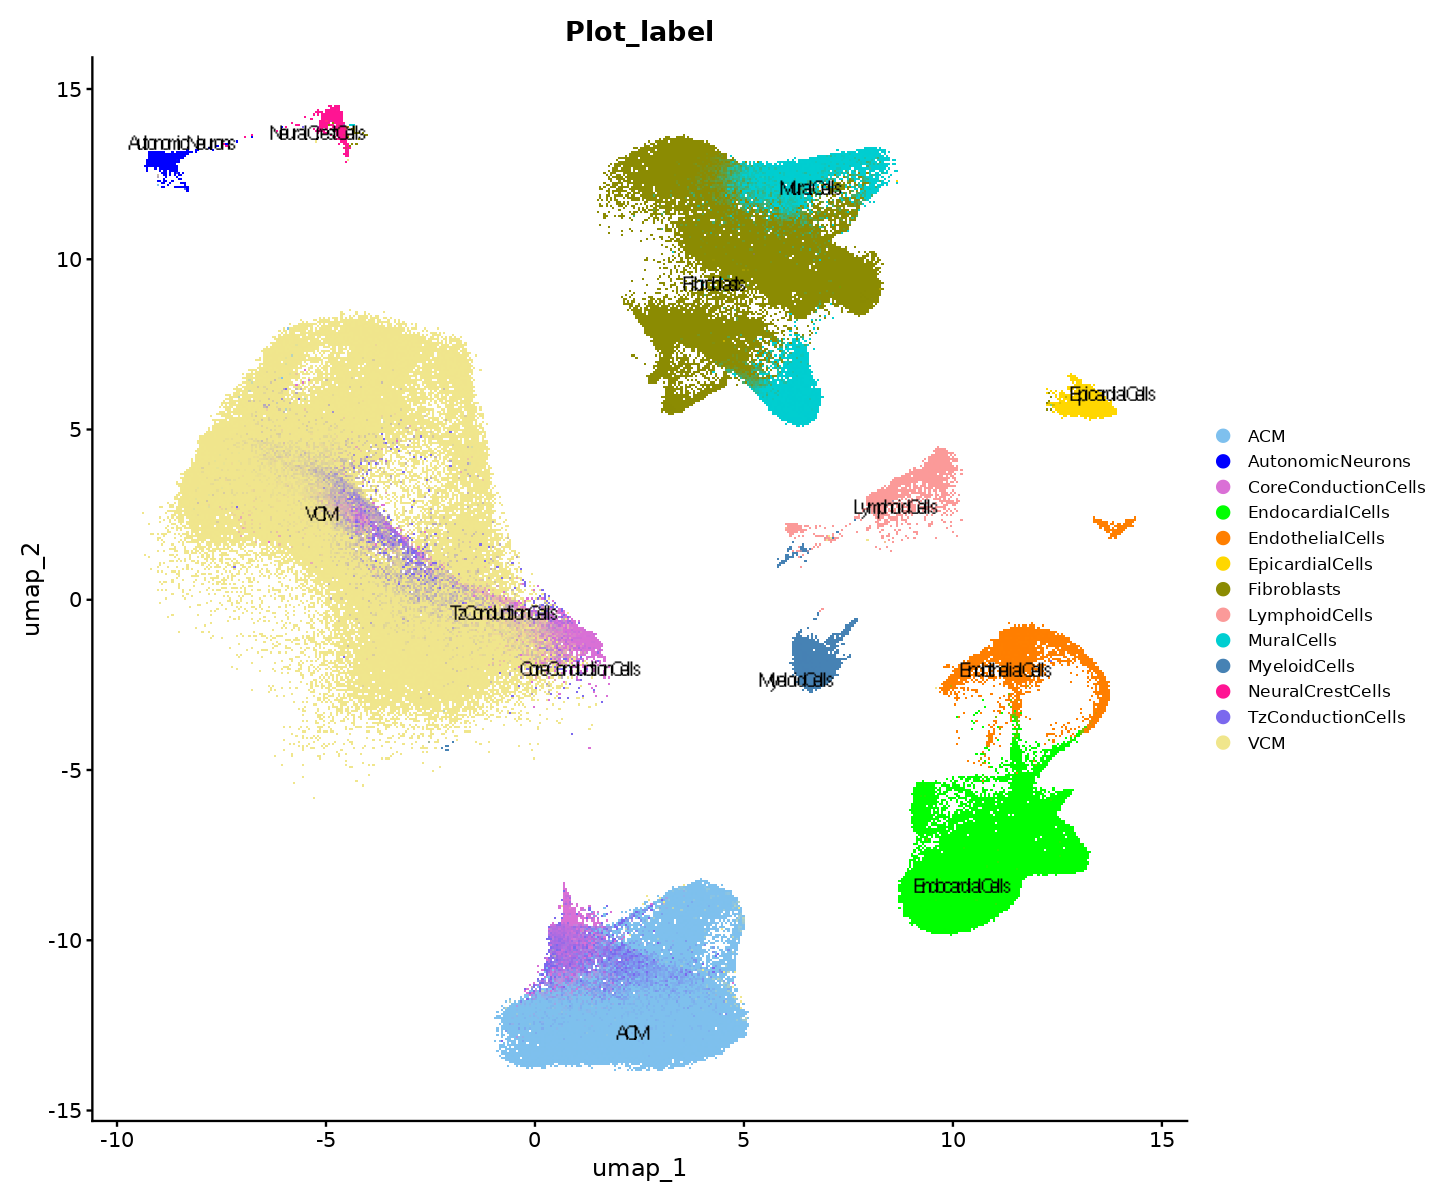

In [60]:
color.map <- read.csv('./Items2Include - CelltypeList.v09162024.csv') %>% head(-1) %>% select(Plot_label, HexColorCode) %>% unique %>% pull(HexColorCode)
names(color.map) <- read.csv('./Items2Include - CelltypeList.v09162024.csv') %>% head(-1) %>% select(Plot_label, HexColorCode) %>% unique %>% pull(Plot_label)
color.map


o(12,10)
DimPlot(seu.all.early, group.by='Plot_label', cols = color.map, raster=T, label=T, repel=T) & theme(
    text = element_text(family = "DejaVu Sans"),
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold", family = "DejaVu Sans"),
    axis.title.x = element_text(size = 14, family = "DejaVu Sans"),
    axis.title.y = element_text(size = 14, family = "DejaVu Sans"),
    axis.text.x = element_text(size = 12, family = "DejaVu Sans"),
    axis.text.y = element_text(size = 12, family = "DejaVu Sans"),
    legend.title = element_text(size = 12, family = "DejaVu Sans"),
    legend.text = element_text(size = 10, family = "DejaVu Sans")
)

In [61]:
saveRDS(seu.all.healthy, file = '/oak/stanford/groups/xiaojie/chensj16/data/engreitz-lab/seu.filtered.RDS')


In [62]:
saveRDS(seu.all.early, file = '/oak/stanford/groups/xiaojie/chensj16/data/engreitz-lab/seu.early.RDS')


# CCI object construction

In [76]:
suppressPackageStartupMessages({
    library(Seurat)
    library(ggpubr)
    library(dplyr)
    library(dittoSeq)
    library(tidyseurat)
    library(tictoc)
    library(CellChat)
})

o<-function(w,h)options(repr.plot.width=w, repr.plot.height=h)


In [78]:
CellChatDB <- CellChatDB.human # use CellChatDB.mouse if running on mouse data

CellChatDB.use <- subsetDB(CellChatDB, search = c("Cell-Cell Contact","Secreted Signaling","Non-protein Signaling"), key = "annotation")



The non-protein signaling is now included for CellChat analysis, which is usually used for neuron-neuron and metabolic communication!



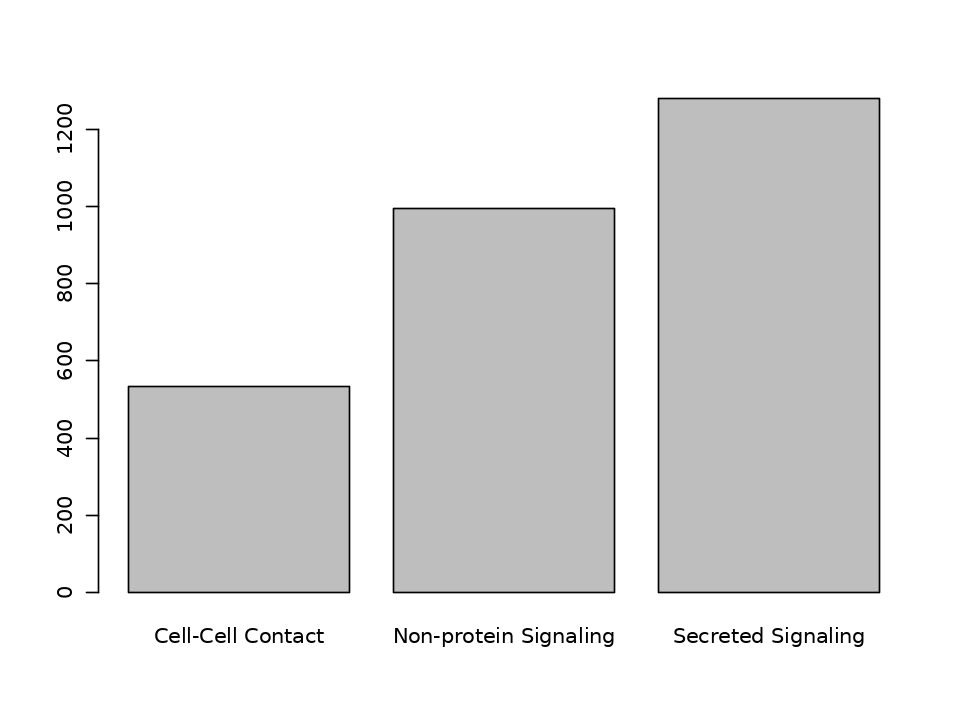

In [97]:
o(8,6)
par(family = 'DejaVu Sans')
barplot(table(CellChatDB.use$interaction$annotation))

In [ ]:
seu.list[['8']] -> seurat_object
cellchat <- createCellChat(object = seurat_object, group.by = "celltype", assay = "RNA")
cellchat@DB <- CellChatDB.use


In [102]:
seu.list <- SplitObject(seu.all.early, split.by = 'Rounded.PCW')
cat(names(seu.list))

8 9 7 6

In [106]:
cci.list <- list()

cellchat <- createCellChat(object = seu.list[['6']], group.by = "New_Name", assay = "RNA")
cellchat@DB <- CellChatDB.use
cellchat -> cci.list[["6"]]

cellchat <- createCellChat(object = seu.list[['7']], group.by = "New_Name", assay = "RNA")
cellchat@DB <- CellChatDB.use
cellchat -> cci.list[["7"]]

cellchat <- createCellChat(object = seu.list[['8']], group.by = "New_Name", assay = "RNA")
cellchat@DB <- CellChatDB.use
cellchat -> cci.list[["8"]]

cellchat <- createCellChat(object = seu.list[['9']], group.by = "New_Name", assay = "RNA")
cellchat@DB <- CellChatDB.use
cellchat -> cci.list[["9"]]

[1] "Create a CellChat object from a Seurat object"
The `meta.data` slot in the Seurat object is used as cell meta information 


Warning message in createCellChat(object = seu.list[["7"]], group.by = "New_Name", :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  ACM_cell_cycling, ACM_left, ACM_left_highTNNI_1, ACM_left_highTNNI_2, ACM_left_lowTNNI, ACM_right_highTNNI_1, ACM_right_highTNNI_2, ACM_right_lowTNNI_1, ACM_right_lowTNNI_3, Aortic_endothelial_cells_1, Atrial_endocardial_cells, Atrial_fibroblasts, Atrial_septum_endocardial_cells, AV_bundle, AV_bundle_transitional_cells, AV_node, AV_node_transitional_cells, AV_valve_CM, B_cells, Capillary_endothelial_cells_1, Capillary_endothelial_cells_2, Cardiac_fibroblast_progenitors, DMP_1, DMP_2, DMP_3, Endocardial_cell_cycling, Endocardial_to_endothelial_transtition, Endothelial_cell_cycling_1, Endothelial_cell_cycling_2, Epicardial_1, Epicardial_2, Epicardial_3, Epicardial_4, Epicardial_5, Epicardial_cell_cycling, IFT_valvular_endocardial_cells, Lymphatic_endothelial_cell_cycling, Lymphatic_endothelial_cells, Macrophages_1, Macrophages_2, Macrophages_3, Macrophages_cell_cycling, Mast_cells, Mature_art

Warning message in createCellChat(object = seu.list[["8"]], group.by = "New_Name", :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  ACM_cell_cycling, ACM_left, ACM_left_highTNNI_1, ACM_left_highTNNI_2, ACM_left_lowTNNI, ACM_right_highTNNI_1, ACM_right_highTNNI_2, ACM_right_lowTNNI_1, ACM_right_lowTNNI_2, ACM_right_lowTNNI_3, Aortic_endothelial_cells_1, Aortic_endothelial_cells_2, Atrial_endocardial_cells, Atrial_fibroblasts, Atrial_septum_endocardial_cells, AV_bundle, AV_bundle_transitional_cells, AV_node, AV_node_transitional_cells, AV_valve_CM, B_cells, Capillary_endothelial_cells_1, Capillary_endothelial_cells_2, Cardiac_fibroblast_progenitors, DMP_1, DMP_2, DMP_3, Endocardial_cell_cycling, Endocardial_to_endothelial_transtition, Endothelial_cell_cycling_1, Endothelial_cell_cycling_2, Epicardial_1, Epicardial_2, Epicardial_3, Epicardial_4, Epicardial_5, Epicardial_cell_cycling, IFT_valvular_endocardial_cells, Lymphatic_endothelial_cell_cycling, Lymphatic_endothelial_cells, Macrophages_1, Macrophages_2, Macrophages_3,

Warning message in createCellChat(object = seu.list[["9"]], group.by = "New_Name", :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  ACM_cell_cycling, ACM_left, ACM_left_highTNNI_1, ACM_left_highTNNI_2, ACM_left_lowTNNI, ACM_right_highTNNI_1, ACM_right_highTNNI_2, ACM_right_lowTNNI_1, ACM_right_lowTNNI_2, ACM_right_lowTNNI_3, Aortic_endothelial_cells_1, Atrial_endocardial_cells, Atrial_fibroblasts, Atrial_septum_endocardial_cells, AV_bundle, AV_bundle_transitional_cells, AV_node, AV_node_transitional_cells, AV_valve_CM, Capillary_endothelial_cells_1, Capillary_endothelial_cells_2, Cardiac_fibroblast_progenitors, DMP_1, DMP_2, DMP_3, Endocardial_cell_cycling, Endocardial_to_endothelial_transtition, Endothelial_cell_cycling_1, Endothelial_cell_cycling_2, Epicardial_1, Epicardial_2, Epicardial_3, Epicardial_5, Epicardial_cell_cycling, IFT_valvular_endocardial_cells, Lymphatic_endothelial_cells, Macrophages_1, Macrophages_3, Macrophages_cell_cycling, Mast_cells, Mature_arterial_endothelial, Mature_fibroblasts, Mesenchymal_ce

In [108]:
cci.list

$`6`
An object of class CellChat created from a single dataset 
 31019 genes.
 28630 cells. 
CellChat analysis of single cell RNA-seq data! 

$`7`
An object of class CellChat created from a single dataset 
 31019 genes.
 89720 cells. 
CellChat analysis of single cell RNA-seq data! 

$`8`
An object of class CellChat created from a single dataset 
 31019 genes.
 136608 cells. 
CellChat analysis of single cell RNA-seq data! 

$`9`
An object of class CellChat created from a single dataset 
 31019 genes.
 16513 cells. 
CellChat analysis of single cell RNA-seq data! 


In [109]:
saveRDS(cci.list, file = 'early.cci.list.v230905.RDS')

In [2]:
cci.list <- readRDS( file = 'early.cci.list.v230905.RDS')

In [3]:
cellchat <- cci.list[['8']]

In [4]:
cellchat <-  cellchat %>% subsetData %>% identifyOverExpressedGenes %>% 
    identifyOverExpressedInteractions %>% computeCommunProb(type = "triMean") %>%
    filterCommunication(min.cells = 3) %>% computeCommunProbPathway() %>% aggregateNet() %>% netAnalysis_computeCentrality(slot.name = "netP")


triMean is used for calculating the average gene expression per cell group. 


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.2 GiB”


The number of highly variable ligand-receptor pairs used for signaling inference is 2128 


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.2 GiB”


[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-09-17 15:20:33.748319]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-17 16:15:06.040424]"


In [5]:
saveRDS(cellchat, file = 'cellchat.pcw8.RDS')

In [6]:
cellchat

An object of class CellChat created from a single dataset 
 31019 genes.
 136608 cells. 
CellChat analysis of single cell RNA-seq data! 